In [1]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense 
import seaborn as sb
import pandas as pd


In [2]:
import numpy as np
from numpy import NaN
df = pd.read_excel("AirQualityUCI.xlsx")


df['Date'] = df['Date'].dt.month
df['Time'] = pd.to_datetime(df['Time'], format='%X').dt.hour

df = df.replace(-200, NaN)

df =  df.drop(['NMHC(GT)'], axis=1) 
df = df.dropna() 
df = df.drop_duplicates() 
df = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,12]] 

In [3]:


arr = df.to_numpy()
X = arr[:, 0:13]
Y = arr[:, 13]

#Test Train Split:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

Y_train = Y_train.reshape((Y_train.shape[0], 1))
Y_test = Y_test.reshape((Y_test.shape[0], 1)) 

In [4]:
# Normalising Data:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

In [5]:
#1st Model

model1 = tf.keras.Sequential([normalizer])
model1.add(Dense(64, input_dim=13, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='linear'))
model1.summary()
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007), loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,980
Trainable params: 1,953
Non-trainable params: 27
_________________________________________________________________


In [6]:

history1 = model1.fit(X_train, Y_train, epochs=100)



Epoch 1/100
174/174 [==============================] - 1s 1ms/step - loss: 1932.1079
Epoch 2/100
174/174 [==============================] - 0s 982us/step - loss: 499.0243
Epoch 3/100
174/174 [==============================] - 0s 974us/step - loss: 223.0188
Epoch 4/100
174/174 [==============================] - 0s 1ms/step - loss: 100.9084
Epoch 5/100
174/174 [==============================] - 0s 992us/step - loss: 59.1263
Epoch 6/100
174/174 [==============================] - 0s 985us/step - loss: 41.8310
Epoch 7/100
174/174 [==============================] - 0s 977us/step - loss: 32.5023
Epoch 8/100
174/174 [==============================] - 0s 1ms/step - loss: 26.8400
Epoch 9/100
174/174 [==============================] - 0s 978us/step - loss: 22.4413
Epoch 10/100
174/174 [==============================] - 0s 1ms/step - loss: 18.2643
Epoch 11/100
174/174 [==============================] - 0s 997us/step - loss: 14.6810
Epoch 12/100
174/174 [==============================] - 0s 969us/s

174/174 [==============================] - 0s 1ms/step - loss: 0.2788
Epoch 99/100
174/174 [==============================] - 0s 934us/step - loss: 0.2769
Epoch 100/100
174/174 [==============================] - 0s 904us/step - loss: 0.2730


In [7]:

Y_pred1 = model1.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.2839


In [8]:
#2nd Model

model2 = tf.keras.Sequential([normalizer])
model2.add(Dense(256, input_dim=13, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='relu'))
model2.summary()
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008), loss='mean_squared_error')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 256)               3584      
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 69,660
Trainable params: 69,633
Non-trainable params: 27
_________________________________________________________________


Epoch 1/100
174/174 [==============================] - 1s 1ms/step - loss: 685.7573
Epoch 2/100
174/174 [==============================] - 0s 1ms/step - loss: 51.9301
Epoch 3/100
174/174 [==============================] - 0s 1ms/step - loss: 26.9415
Epoch 4/100
174/174 [==============================] - 0s 1ms/step - loss: 19.1186
Epoch 5/100
174/174 [==============================] - 0s 1ms/step - loss: 13.6599
Epoch 6/100
174/174 [==============================] - 0s 1ms/step - loss: 9.9118
Epoch 7/100
174/174 [==============================] - 0s 1ms/step - loss: 7.6678
Epoch 8/100
174/174 [==============================] - 0s 1ms/step - loss: 6.1033
Epoch 9/100
174/174 [==============================] - 0s 1ms/step - loss: 5.1473
Epoch 10/100
174/174 [==============================] - 0s 1ms/step - loss: 4.2095
Epoch 11/100
174/174 [==============================] - 0s 1ms/step - loss: 3.4870
Epoch 12/100
174/174 [==============================] - 0s 1ms/step - loss: 2.9104
Epoch 1

174/174 [==============================] - 0s 1ms/step - loss: 0.1760
Epoch 100/100
174/174 [==============================] - 0s 1ms/step - loss: 0.1812


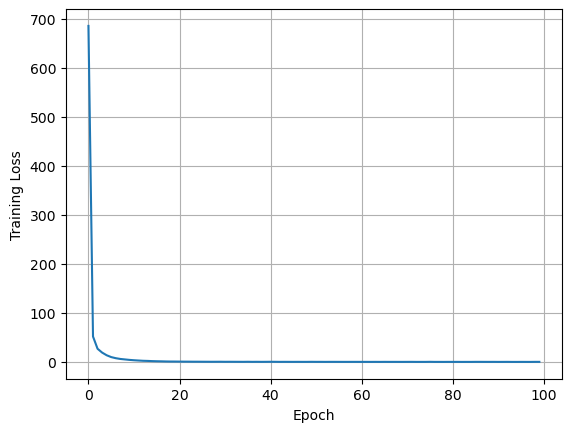

In [9]:
#Training the model:
history2 = model2.fit(X_train, Y_train, epochs=100)

plt.plot(history2.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()

In [10]:
#Test Loss:
Y_pred2 = model2.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.2161


In [11]:
#3rd Model

model3 = tf.keras.Sequential([normalizer])
model3.add(Dense(512, input_dim=13, activation='relu'))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(1, activation='relu'))
model3.summary()
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008), loss='mean_squared_error')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_6 (Dense)             (None, 512)               7168      
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 1)                 513       
                                                                 
Total params: 270,364
Trainable params: 270,337
Non-trainable params: 27
_________________________________________________________________


In [12]:
#Training the model:
history3 = model3.fit(X_train, Y_train, epochs=100)



Epoch 1/100
174/174 [==============================] - 1s 5ms/step - loss: 458.1635
Epoch 2/100
174/174 [==============================] - 1s 4ms/step - loss: 32.3605
Epoch 3/100
174/174 [==============================] - 1s 5ms/step - loss: 17.3795
Epoch 4/100
174/174 [==============================] - 1s 5ms/step - loss: 10.8272
Epoch 5/100
174/174 [==============================] - 1s 4ms/step - loss: 7.8652
Epoch 6/100
174/174 [==============================] - 1s 4ms/step - loss: 6.0128
Epoch 7/100
174/174 [==============================] - 1s 5ms/step - loss: 4.9763
Epoch 8/100
174/174 [==============================] - 1s 4ms/step - loss: 3.9447
Epoch 9/100
174/174 [==============================] - 1s 5ms/step - loss: 3.2590
Epoch 10/100
174/174 [==============================] - 1s 5ms/step - loss: 2.5320
Epoch 11/100
174/174 [==============================] - 1s 5ms/step - loss: 2.3077
Epoch 12/100
174/174 [==============================] - 1s 4ms/step - loss: 1.7952
Epoch 13

174/174 [==============================] - 1s 5ms/step - loss: 0.0921
Epoch 100/100
174/174 [==============================] - 1s 5ms/step - loss: 0.1836


In [13]:
#Test Loss:
Y_pred3 = model3.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.2108


In [14]:
#4th Model

model4 = tf.keras.Sequential([normalizer])
model4.add(Dense(256, input_dim=13, activation='relu'))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(1, activation='linear'))
model4.summary()
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_9 (Dense)             (None, 256)               3584      
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 256)               65792     
                                                                 
 dense_12 (Dense)            (None, 1)                 257       
                                                                 
Total params: 135,452
Trainable params: 135,425
Non-trainable params: 27
_______________________________________________

Epoch 1/100
174/174 [==============================] - 1s 2ms/step - loss: 1688.5000
Epoch 2/100
174/174 [==============================] - 0s 2ms/step - loss: 338.1730
Epoch 3/100
174/174 [==============================] - 0s 2ms/step - loss: 158.8691
Epoch 4/100
174/174 [==============================] - 0s 2ms/step - loss: 78.0030
Epoch 5/100
174/174 [==============================] - 0s 2ms/step - loss: 48.8391
Epoch 6/100
174/174 [==============================] - 0s 2ms/step - loss: 33.7834
Epoch 7/100
174/174 [==============================] - 1s 4ms/step - loss: 24.5124
Epoch 8/100
174/174 [==============================] - 0s 2ms/step - loss: 18.6857
Epoch 9/100
174/174 [==============================] - 0s 3ms/step - loss: 15.1981
Epoch 10/100
174/174 [==============================] - 1s 3ms/step - loss: 12.7737
Epoch 11/100
174/174 [==============================] - 0s 3ms/step - loss: 11.0477
Epoch 12/100
174/174 [==============================] - 0s 2ms/step - loss: 9.748

174/174 [==============================] - 0s 2ms/step - loss: 0.1777
Epoch 100/100
174/174 [==============================] - 0s 2ms/step - loss: 0.1706


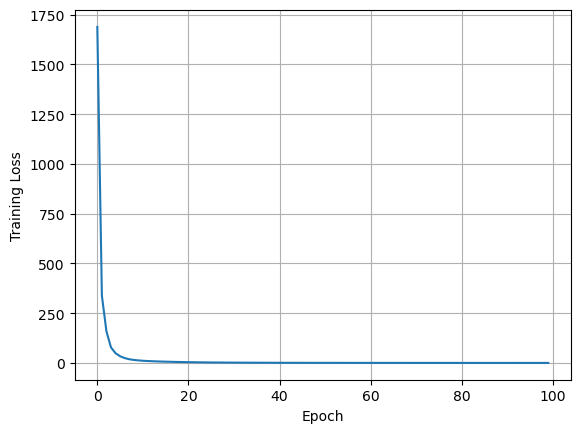

In [15]:
#Training the model:
history4 = model4.fit(X_train, Y_train, epochs=100)

plt.plot(history4.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()

In [16]:
#Test Loss:
Y_pred4 = model4.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.2706


In [17]:
#5th Model

model5 = tf.keras.Sequential([normalizer])
model5.add(Dense(512, input_dim=13, activation='relu'))
model5.add(Dense(256, activation='relu'))
model5.add(Dense(1, activation='linear'))
model5.summary()
model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_13 (Dense)            (None, 512)               7168      
                                                                 
 dense_14 (Dense)            (None, 256)               131328    
                                                                 
 dense_15 (Dense)            (None, 1)                 257       
                                                                 
Total params: 138,780
Trainable params: 138,753
Non-trainable params: 27
_________________________________________________________________


Epoch 1/100
174/174 [==============================] - 1s 2ms/step - loss: 2132.4158
Epoch 2/100
174/174 [==============================] - 0s 2ms/step - loss: 770.6225
Epoch 3/100
174/174 [==============================] - 0s 2ms/step - loss: 415.1790
Epoch 4/100
174/174 [==============================] - 0s 2ms/step - loss: 258.8168
Epoch 5/100
174/174 [==============================] - 0s 2ms/step - loss: 159.9748
Epoch 6/100
174/174 [==============================] - 0s 2ms/step - loss: 103.7835
Epoch 7/100
174/174 [==============================] - 0s 2ms/step - loss: 73.0480
Epoch 8/100
174/174 [==============================] - 0s 2ms/step - loss: 55.2679
Epoch 9/100
174/174 [==============================] - 0s 2ms/step - loss: 44.0390
Epoch 10/100
174/174 [==============================] - 0s 2ms/step - loss: 35.8559
Epoch 11/100
174/174 [==============================] - 0s 2ms/step - loss: 29.8673
Epoch 12/100
174/174 [==============================] - 0s 2ms/step - loss: 25

174/174 [==============================] - 0s 2ms/step - loss: 0.1471
Epoch 100/100
174/174 [==============================] - 0s 2ms/step - loss: 0.1320


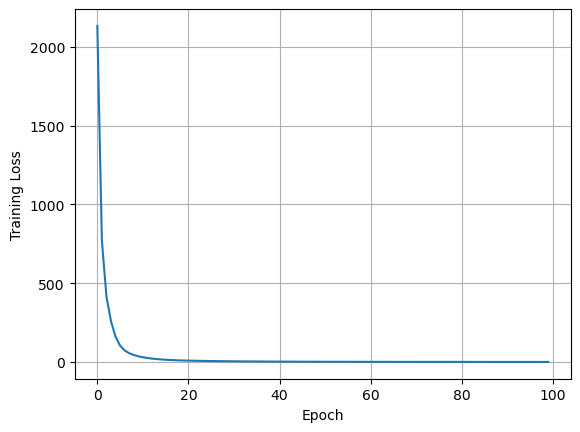

In [18]:
history5 = model5.fit(X_train, Y_train, epochs=100)

plt.plot(history5.history['loss'])
# plt.ylim([0,10])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()

In [19]:
#Test Loss:
Y_pred5 = model5.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.2232
